# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [91]:
# common import for all cells
SEED=202
DATA_DIR='/root/share/project/udacity/project2_02/data'
OUT_DIR ='/root/share/out/udacity/08'

# standard libs
import pickle
import csv
from timeit import default_timer as timer
import os
import sys


#visualisation
%matplotlib inline

import matplotlib.pyplot as plt 
from IPython.display import Image
from IPython.display import display

# numerical libs 
import cv2
import math

import random
import numpy as np
random.seed(SEED)
np.random.seed(SEED)

import tensorflow as tf
tf.set_random_seed(SEED)

from tensorflow.python.training import moving_averages
from tensorflow.contrib.framework import add_model_variable
sess = tf.InteractiveSession()


---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
data_dir = '/Users/shleifer/flow/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/'
DATA_DIR = data_dir
training_file = data_dir + 'train.p'
validation_file= data_dir + 'valid.p'
testing_file =data_dir + 'test.p'

#testing_file = ?

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)



In [3]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [94]:
import matplotlib.pyplot as plt

In [95]:
import pandas as pd
#pd.Series(y_test)

In [96]:
%matplotlib inline

pd.Series(y_train).nunique(), pd.Series(y_valid).nunique(),pd.Series(y_test).nunique()

(43, 43, 43)

In [97]:
X_train.shape

(34799, 32, 32, 3)

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [98]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_valid.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]
# TODO: How many unique classes/labels there are in the dataset.
n_classes = pd.Series(y_train).nunique()

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


In [6]:
classnames = pd.read_csv('signnames.csv', index_col=0).SignName

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [100]:
signnames_path =  'udacity-driverless-car-nd-p2/data/signnames_all.jpg'

In [16]:
import numpy as np
# TODO: Number of training examples 
num_train = len(X_train)

# TODO: Number of testing examples.
num_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
_, height, width, channel = X_train.shape
image_shape = (height, width, channel)

# TODO: How many unique classes/labels there are in the dataset.
num_class = len(np.unique(y_train))

In [18]:
num_train, len(X_valid), num_test

(34799, 4410, 12630)

In [102]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [103]:
import numpy as np

In [104]:
from matplotlib.pyplot import imshow

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

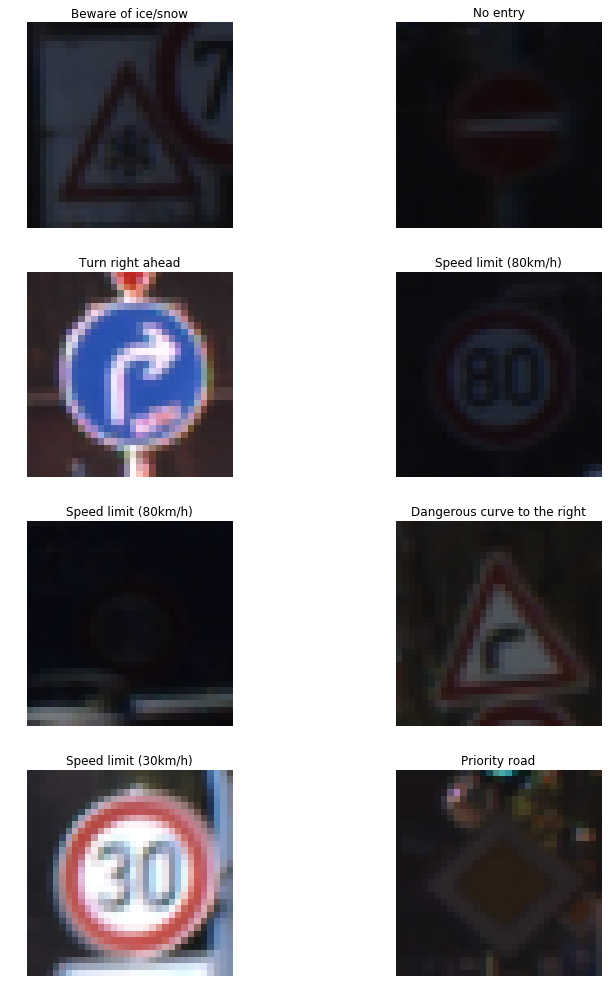

In [105]:

### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random
import csv

def plot_figures(figures, nrows = 1, ncols=1, labels=None):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 14))
    axs = axs.ravel()
    for index, title in zip(range(len(figures)), figures):
        axs[index].imshow(figures[title], plt.gray())
        if(labels != None):
           axs[index].set_title(labels[index])
        else:
            axs[index].set_title(title)
            
        axs[index].set_axis_off()
        
    plt.tight_layout()
    
name_values = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')
    
number_to_stop = 8
figures = {}
labels = {}
for i in range(number_to_stop):
    index = random.randint(0, n_train-1)
    labels[i] = name_values[y_train[index]][1].decode('ascii')
#     print(name_values[y_train[index]][1].decode('ascii'))
    figures[i] = X_train[index]
    
plot_figures(figures, 4, 2, labels)


Normalize images

In [106]:
X_train_normalized = X_train/127.5-1
X_valid_normalized = X_valid/127.5-1
X_test_normalized = X_test/127.5-1

In [107]:
name_values = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')

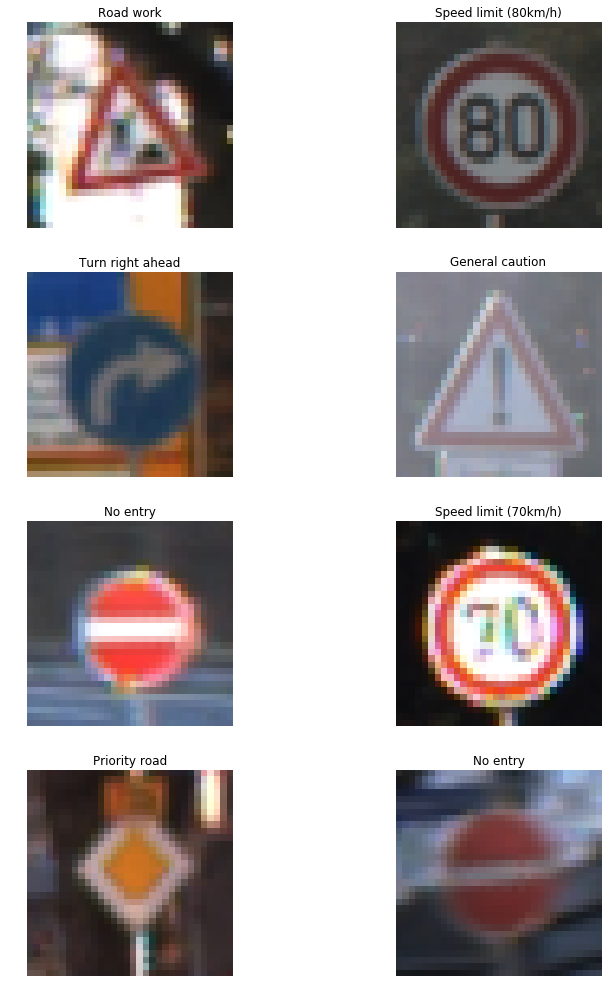

In [108]:
image_depth_channels = X_train.shape[3]

# print(image_depth_channels)
number_to_stop = 8
figures = {}
labels = {}
for i in range(number_to_stop):
    index = random.randint(0, n_train-1)
    labels[i] = name_values[y_train[index]][1].decode('ascii')
#     print(name_values[y_train[index]][1].decode('ascii'))
    figures[i] = X_train[index]
    
#plot_figures(figures, 4, 2, labels)
number_to_stop = 8
figures = {}
random_signs = []
for i in range(number_to_stop):
    index = random.randint(0, n_train-1)
    labels[i] = name_values[y_train[index]][1].decode('ascii')
    figures[i] = X_train[index].squeeze()
    random_signs.append(index)
    
# print(random_signs)
plot_figures(figures, 4, 2, labels)

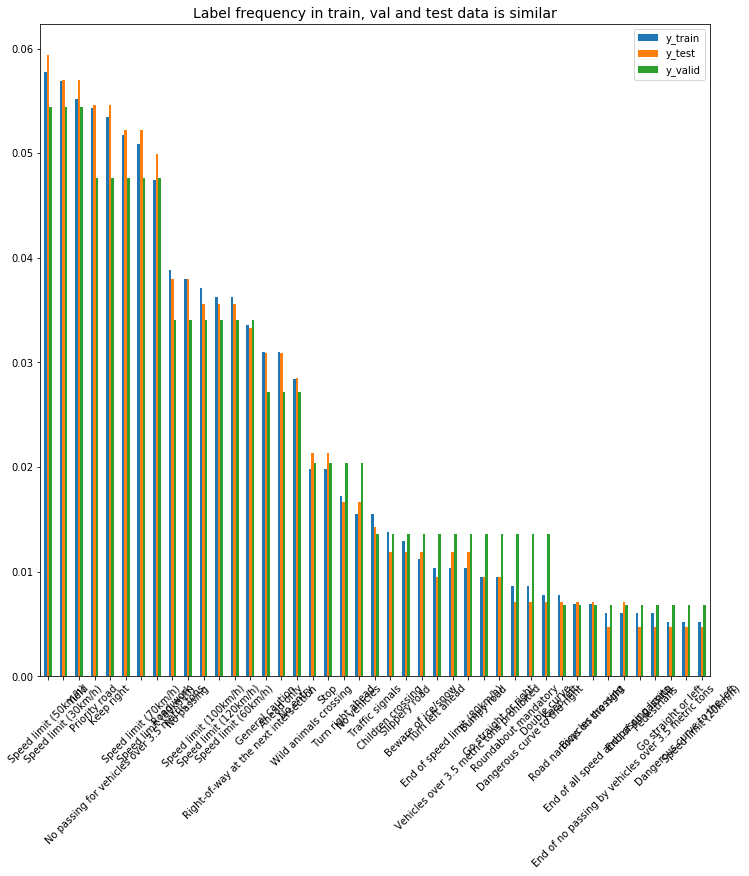

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ax = pd.value_counts(y_train, normalize=True).to_frame('y_train').assign(
    y_valid=pd.value_counts(y_valid, normalize=True),
    y_test=pd.value_counts(y_test, normalize=True),
                                                    ).rename(index=classnames).plot.bar(rot=45, figsize=(12,12)
                                                          )
#pd.value_counts(y_valid, normalize=True).rename(index=classnames).plot.bar(ax=ax, rot=45, figsize=(12,12),
#                                                          color='red')
plt.title('Label frequency in train, val and test data is similar',
          fontsize=14)

Speed limit sigs very frequent.

### Model Architecture

In [87]:
from tensorflow.contrib.layers import flatten

mu = 0
sigma = 0.1
def conv2d_relu(x, w_shape, strides=1, padding='VALID'):
    W = tf.Variable(tf.truncated_normal(shape=w_shape, mean=mu, stddev=sigma))
    b = tf.Variable(tf.zeros(w_shape[-1]))
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1],
                     padding=padding)
    x = tf.nn.bias_add(x, b)

    return tf.nn.relu(x)


def fc_layer(x, num_outputs):
    fc1 = tf.contrib.layers.fully_connected(x, num_outputs, activation_fn=tf.nn.relu)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    return fc1



def LeNet(x, n_channels=3):
    conv1 = conv2d_relu(x, (5, 5, 3, 6))
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    conv2 = conv2d_relu(conv1, (5, 5, 6, 16))
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.contrib.layers.batch_norm(conv2)
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    fc1 = fc_layer(fc0, 120)
    fc2 = fc_layer(fc1, 84)
    logits = tf.contrib.layers.fully_connected(fc2, n_classes)
    return logits

### Train, Validate and Test the Model

In [20]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [21]:
rate = 0.001

with tf.name_scope('metrics'):
    logits = LeNet(x)
    #tf.summary.histogram('logits', logits)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, 
                                                            logits=logits)
    
    loss_operation = tf.reduce_mean(cross_entropy)
    #tf.summary.scalar('loss_operation', loss_operation)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32),)
    tf.summary.scalar('accuracy', accuracy_operation)

In [22]:
xtr_raw = X_train
xv_raw = X_valid
X_train= X_train_normalized
X_valid = X_valid_normalized

In [23]:
X_train.std()

0.53216383079476426

In [24]:
assert np.round(X_valid.std(), 2) == .55

In [25]:
#(pd.value_counts(y_train, normalize=True) - pd.value_counts(y_valid, normalize=True)).sort_values()

In [26]:

saver = tf.train.Saver()

def evaluate(X_data, y_data, num_examples=None):
    if num_examples is None:
        num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, 
                            feed_dict={x: batch_x, y: batch_y,
                                       keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [27]:
EPOCHS = 20
from sklearn.utils import shuffle
BATCH_SIZE = 156

In [28]:
def log_accuracy(verbose=False):
    validation_accuracy = evaluate(X_valid, y_valid)
    train_accuracy = evaluate(X_train, y_train)
    if verbose:
        print("Train={:.3f}, Validation={:.3f}".format(
            train_accuracy, validation_accuracy))
    return train_accuracy, validation_accuracy

In [29]:
import sys
sys.path.append('.')

In [30]:
sys.path = ['.'] + sys.path

In [31]:
from utils.lenet_udacity import get_n_params
%load_ext autoreload
%autoreload 2

In [32]:
%%time

train_accs = {}
valid_accs = {}
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for j, offset in enumerate(range(0, num_examples, BATCH_SIZE)):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, 
                     feed_dict={x: batch_x, y: batch_y,
                               keep_prob: .5})

        print("EPOCH {} ...".format(i+1))
        
        a,b = log_accuracy(verbose=True)
        train_accs[i] = a
        valid_accs[i] = b
        
    saver.save(sess, './lenet_dropout_bn')
    print("Model saved")

Training...
EPOCH 1 ...
Train=0.622, Validation=0.523
EPOCH 2 ...
Train=0.845, Validation=0.756
EPOCH 3 ...
Train=0.893, Validation=0.825
EPOCH 4 ...
Train=0.937, Validation=0.863
EPOCH 5 ...
Train=0.952, Validation=0.893
EPOCH 6 ...
Train=0.962, Validation=0.901
EPOCH 7 ...
Train=0.971, Validation=0.915
EPOCH 8 ...
Train=0.972, Validation=0.916
EPOCH 9 ...
Train=0.980, Validation=0.922
EPOCH 10 ...
Train=0.981, Validation=0.920
EPOCH 11 ...
Train=0.985, Validation=0.927
EPOCH 12 ...
Train=0.987, Validation=0.931
EPOCH 13 ...
Train=0.986, Validation=0.935
EPOCH 14 ...
Train=0.988, Validation=0.936
EPOCH 15 ...
Train=0.990, Validation=0.938
EPOCH 16 ...
Train=0.990, Validation=0.932
EPOCH 17 ...
Train=0.992, Validation=0.935
EPOCH 18 ...
Train=0.991, Validation=0.941
EPOCH 19 ...
Train=0.993, Validation=0.935
EPOCH 20 ...
Train=0.994, Validation=0.941
Model saved
CPU times: user 37min 15s, sys: 4min 52s, total: 42min 7s
Wall time: 10min 55s


In [88]:
with tf.Session() as sess:
    saver.restore(sess, './lenet_dropout_bn')
    validation_accuracy = evaluate(X_valid, y_valid)
    train_accuracy = evaluate(X_train, y_train)
    test_accuracy = evaluate(X_test_normalized, y_test)

In [89]:
train_accuracy, validation_accuracy, test_accuracy

(0.99387913515671988, 0.9408163253141909, 0.93855898196227194)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [44]:
import glob
import cv2 
import os
import matplotlib.image as mpimg
files = glob.glob('TrafficSignsRuDe/Germany/*jpg')

In [45]:
with tf.Session() as sess:
    saver.restore(sess, './lenet_dropout_bn')
    old_params = get_n_params()

In [46]:
old_params

{'n_params': 64827, 'n_vars': 11}

In [49]:
v = tf.trainable_variables()

In [51]:
sess = tf.Session()
saver.restore(sess, './lenet_dropout_bn')

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

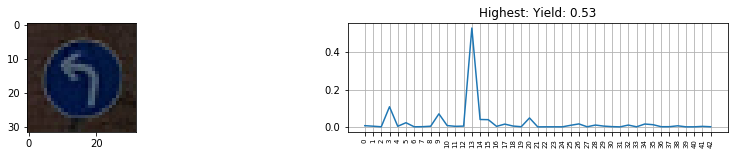

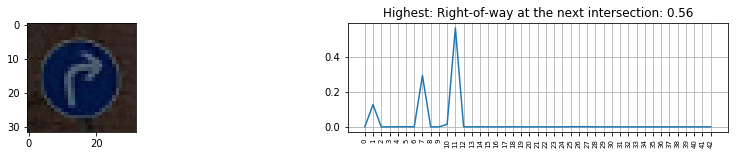

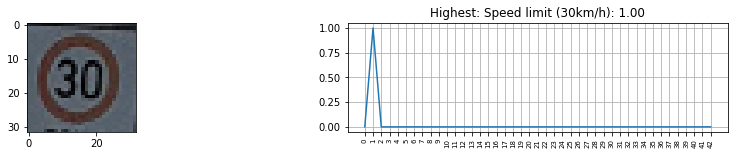

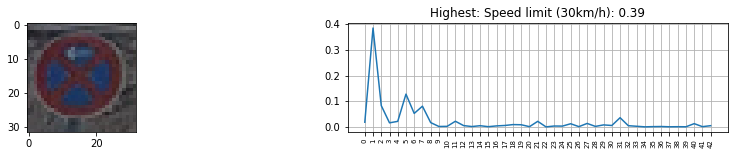

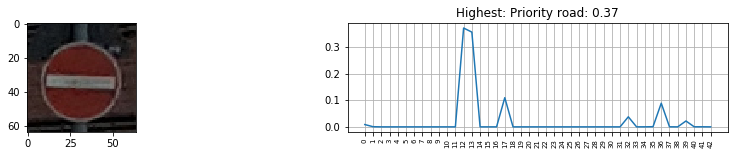

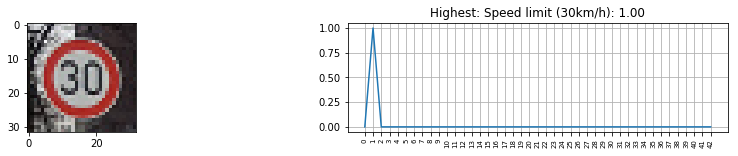

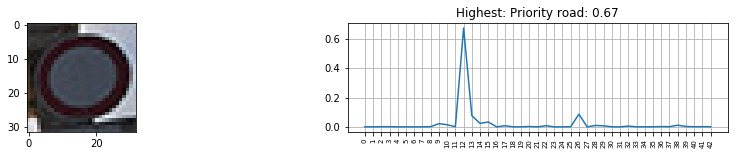

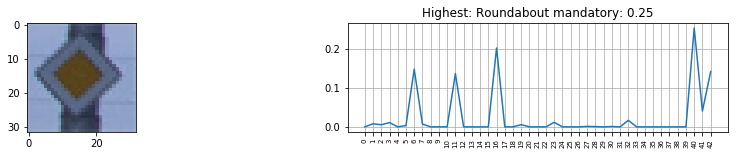

In [79]:
topks = {}
for file in files:
    img = cv2.imread(file)
    img = cv2.resize(img, (32,32))
    im_normalized = np.array([(img / 127.5 - 1)])
    softmax_prob = sess.run(tf.nn.softmax(logits),
                                feed_dict={x:im_normalized, 
                                           keep_prob:1.0})
    v = sess.run(tf.nn.top_k(softmax_prob, k=5))
    topks[file] = classnames.loc[v.indices[0]].to_frame('name').assign(
        file=file, proba=v.values[0])
   
    
    pred_name = classnames.loc[pd.Series(softmax_prob[0]).idxmax()]
    fig = plt.figure(figsize=(15,2))
    ax = fig.add_subplot(1,2,1) 
    img = mpimg.imread(file)
    ax.imshow(img)

    ax = fig.add_subplot(1,2,2) 
    ax.set_xticks(np.arange(0,43,1))
    plt.plot(softmax_prob[0])
    plt.title('Highest: {}: {:.2f}'.format(pred_name, max(softmax_prob[0])))
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize('x-small') 
        tick.label.set_rotation('vertical')
    plt.grid()
    plt.show()

### Analyze Performance

** Accuracy on images from internet: 2/7, very bad!**

In [1]:
file_labels = ['Turn left ahead', 
 'Turn right ahead', 
 'Speed limit (30km/h)',
               '??',
 'No entry',
 'Speed limit (30km/h)',
 'No vehicles',
 'Priority road',
]

In [63]:
cts = pd.value_counts(y_train).rename(index=classnames.to_dict())

In [76]:
v = topks['TrafficSignsRuDe/Germany/1.jpg']

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [84]:
pd.concat(topks.values()).round(2)

,name,file,proba
ClassId,,,
40,Roundabout mandatory,TrafficSignsRuDe/Germany/7.jpg,0.25
16,Vehicles over 3.5 metric tons prohibited,TrafficSignsRuDe/Germany/7.jpg,0.20
6,End of speed limit (80km/h),TrafficSignsRuDe/Germany/7.jpg,0.15
42,End of no passing by vehicles over 3.5 metric ...,TrafficSignsRuDe/Germany/7.jpg,0.14
11,Right-of-way at the next intersection,TrafficSignsRuDe/Germany/7.jpg,0.14
12,Priority road,TrafficSignsRuDe/Germany/4.jpg,0.37
13,Yield,TrafficSignsRuDe/Germany/4.jpg,0.36
17,No entry,TrafficSignsRuDe/Germany/4.jpg,0.11
36,Go straight or right,TrafficSignsRuDe/Germany/4.jpg,0.09
